# Bike Sharing Assignment

## Introduction


### Business Objective
Analyse the dataset and accurately Model the demand for shared bikes for US bike-sharing provider BoomBikes.

### Context of the Problem:
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic and currently is finding it very difficult to sustain in the current market scenario.
- BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19 and stand out from other service providers and make huge profits.
- We as a consulting company hired by BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

#### Target
 Model the demand for shared bikes with the available independent variables which will be a good way for management to understand the demand dynamics of a new market.

##### The Steps we will follow in this exersice are as follows:
1. Reading, understanding and visualising the data and Exploratory Data Analysis
2. Preparing the data for modelling (train-test split, rescalling etc.)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

In [1]:
# Import all the important librabries required for the analysing dataset, creating model and perform predictions
import datetime as dt
import math
import numpy as np
import pandas as pd
import seaborn as sns                       # visualisation
import matplotlib.pyplot as plt             # visualisation
import plotly.express as px                 # visualisation
%matplotlib inline     
sns.set(color_codes=True)

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [83]:
import statsmodels
help(statsmodels)

Help on package statsmodels:

NAME
    statsmodels

PACKAGE CONTENTS
    _version
    api
    base (package)
    compat (package)
    conftest
    datasets (package)
    discrete (package)
    distributions (package)
    duration (package)
    emplike (package)
    formula (package)
    gam (package)
    genmod (package)
    graphics (package)
    imputation (package)
    interface (package)
    iolib (package)
    miscmodels (package)
    multivariate (package)
    nonparametric (package)
    othermod (package)
    regression (package)
    robust (package)
    sandbox (package)
    src (package)
    stats (package)
    tests (package)
    tools (package)
    tsa (package)

SUBMODULES
    __init__

FUNCTIONS
    test(extra_args=None, exit=False)
        Run the test suite
        
        Parameters
        ----------
        extra_args : list[str]
            List of argument to pass to pytest when running the test suite. The
            default is ['--tb=short', '--disable-pytest-war

# 1. Reading and Understanding Data

In [2]:
# Read the Data Set File
bike_sharing_df = pd.read_csv("day.csv")

In [3]:
# Get the overview of the data set
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing_df.shape

(730, 16)

In [5]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

In [6]:
# Check the percentage of missing values in all columns
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<font color="blue">There are no missing values so cannot drop columns based on missing values</font>

### Dropping irrelevant variables

In [7]:
# Dropping variable instant as index is not of use here
# Dropping variable dteday(date) as we have day of week, month and year variables
# Dropping variables casual, registered as the total of these 2 variables constitues cnt variable
bike_sharing_df.drop(columns=['dteday', 'instant', 'casual', 'registered'], axis=1, inplace=True)

### Data Preparation

##### Fixing values for categorical variable `weekday`

In [8]:
bike_sharing_df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [9]:
# {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}  Aakashdeep
weekday_data_dict = {1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}

bike_sharing_df['weekday'] = bike_sharing_df[['weekday']].apply(lambda x: x.map(weekday_data_dict))

#### Fixing values for categorical variable `mnth`

In [10]:
mnth_data_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

bike_sharing_df['mnth'] = bike_sharing_df[['mnth']].apply(lambda x: x.map(mnth_data_dict))

#### Fixing values for categorical variable `season`

In [11]:
season_data_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

bike_sharing_df['season'] = bike_sharing_df[['season']].apply(lambda x: x.map(season_data_dict))

#### Fixing values for categorical variable `weathersit`

In [12]:
weathersit_data_dict = {1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'}

bike_sharing_df['weathersit'] = bike_sharing_df[['weathersit']].apply(lambda x: x.map(weathersit_data_dict))

### Identify the numerical and categorical columns

In [13]:
bike_sharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [14]:
# Numerical Variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Categorical Variables
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

## Exploratory Data Analysis
### Univariate Analysis
###### Numerical vairables

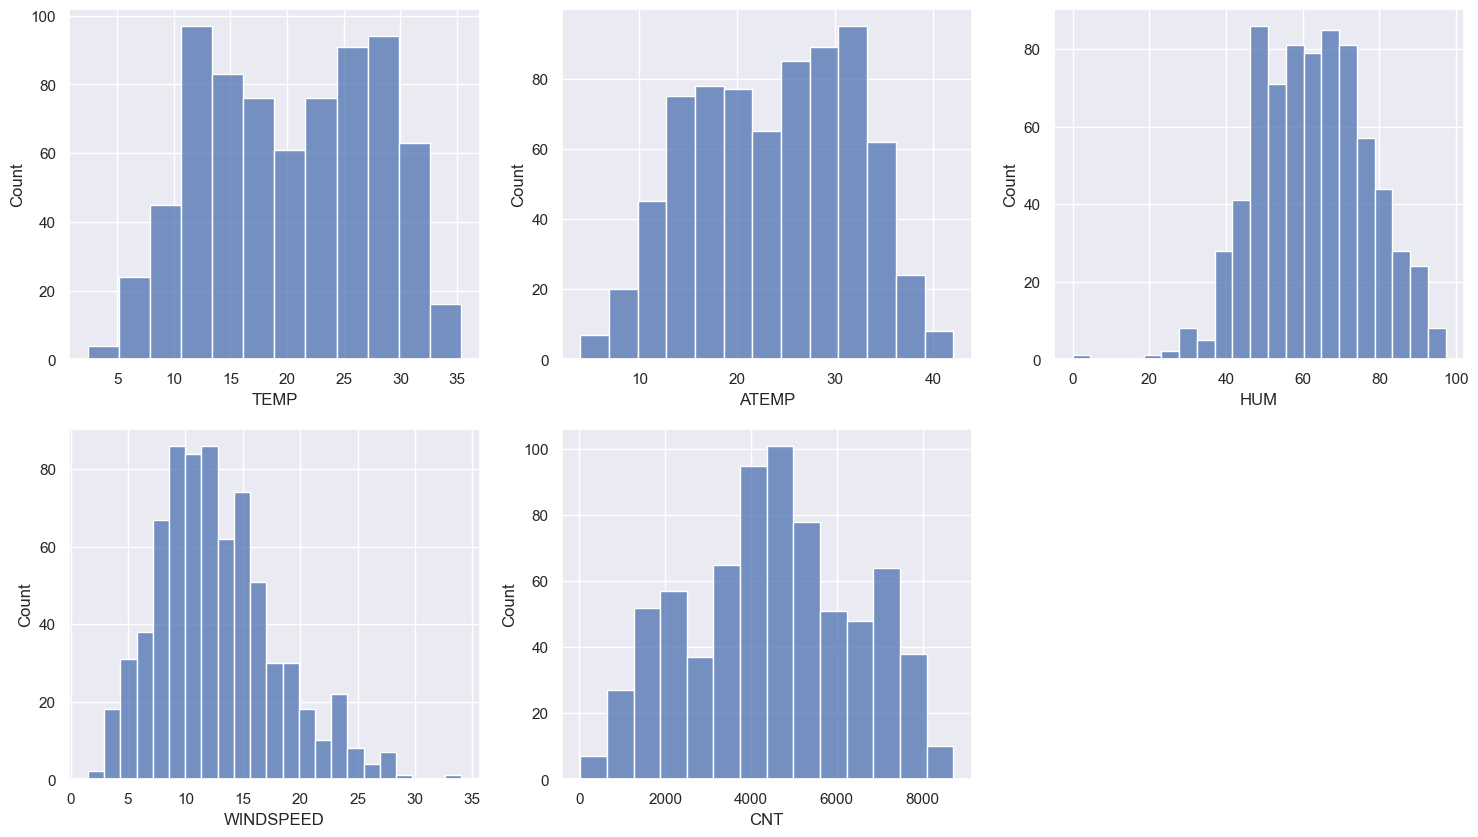

In [15]:
plt.figure(figsize=(18, 10))
for index, var in enumerate(numerical_vars):
    plt.subplot(2, 3, index+1)
    sns.histplot(x=bike_sharing_df[var])
    plt.xlabel(var.upper())
plt.show()

###### Categorical variables

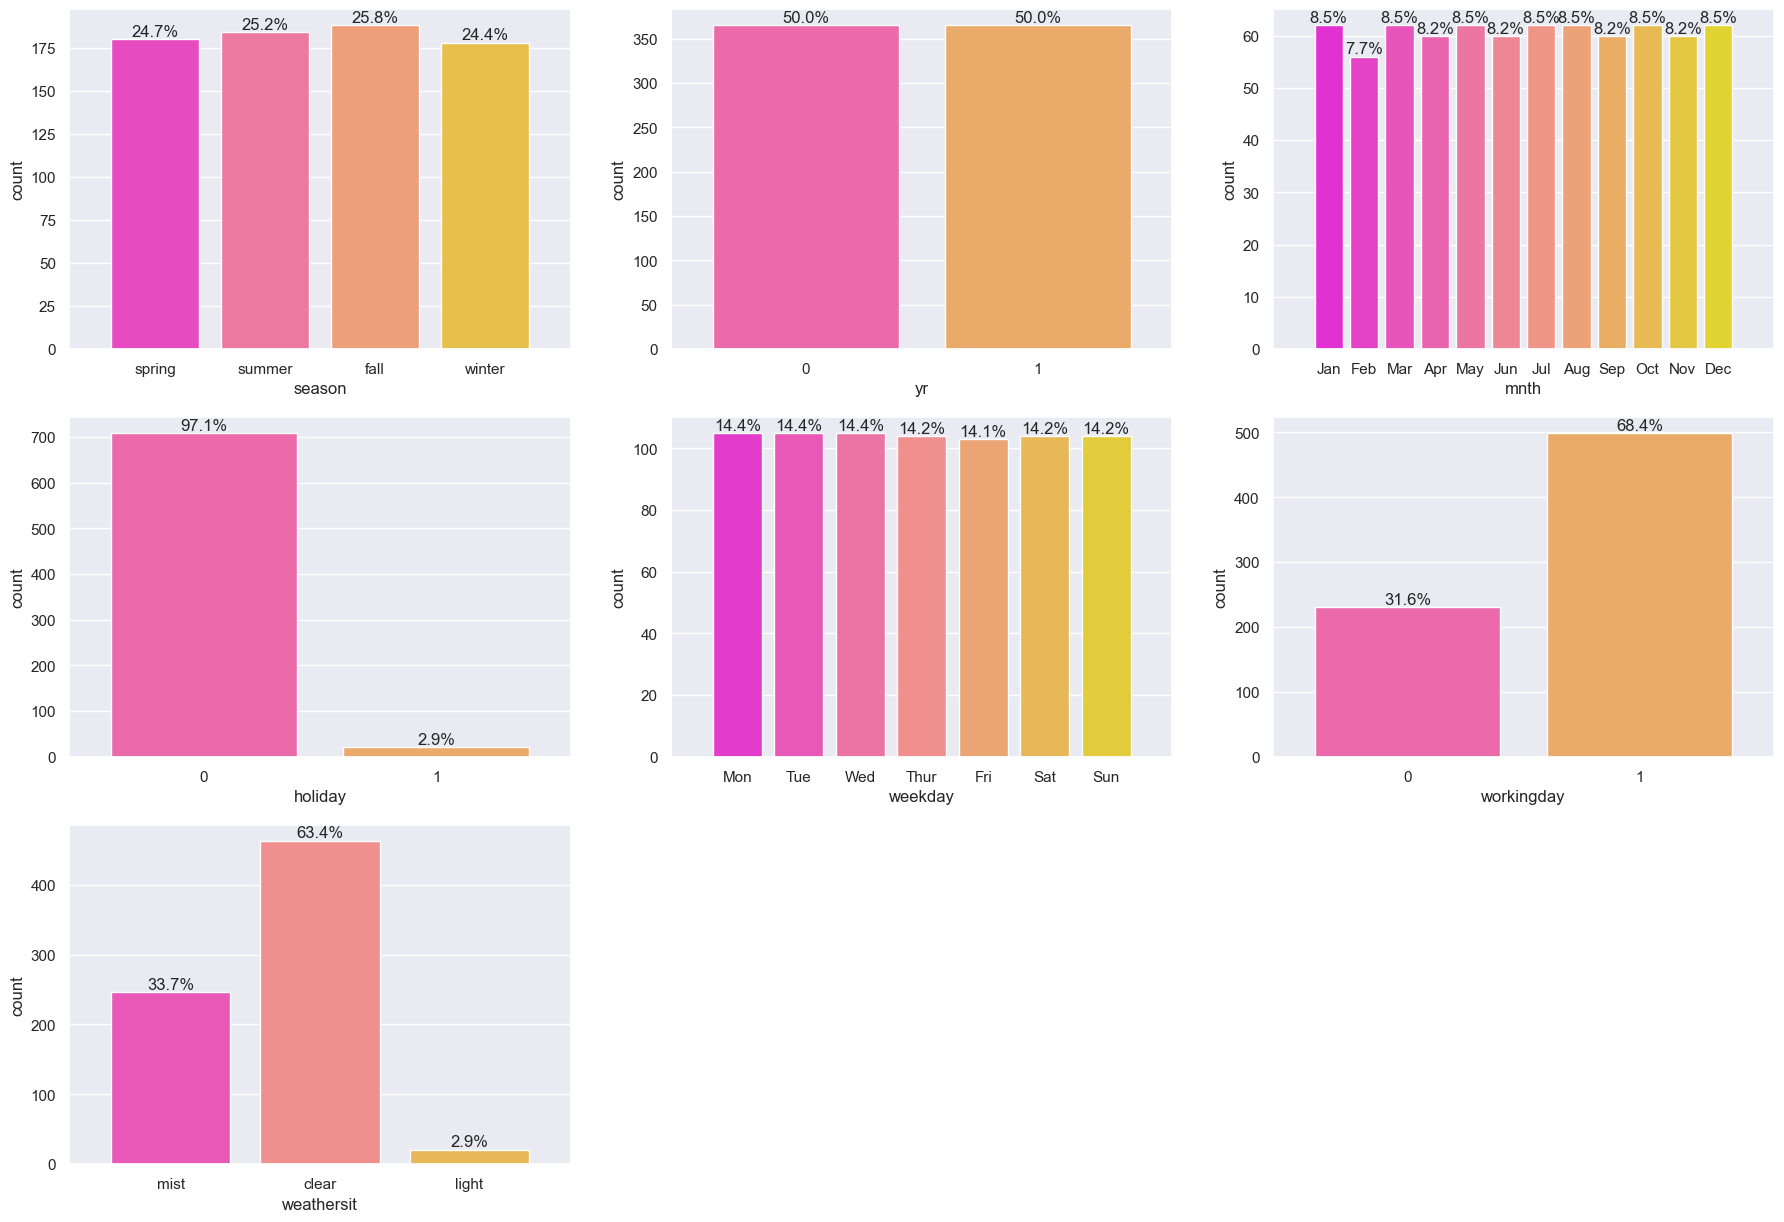

In [16]:
plt.figure(figsize=(22, 15))
for index, var in enumerate(categorical_vars):
    plt.subplot(3, 3, index+1)
    ax = sns.countplot(x=bike_sharing_df[var], palette='spring')
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/bike_sharing_df[var].count())*100:0.1f}%')
    ax.margins(x=0.1)
plt.show()

### Bivariate Analysis
###### Numerical variables

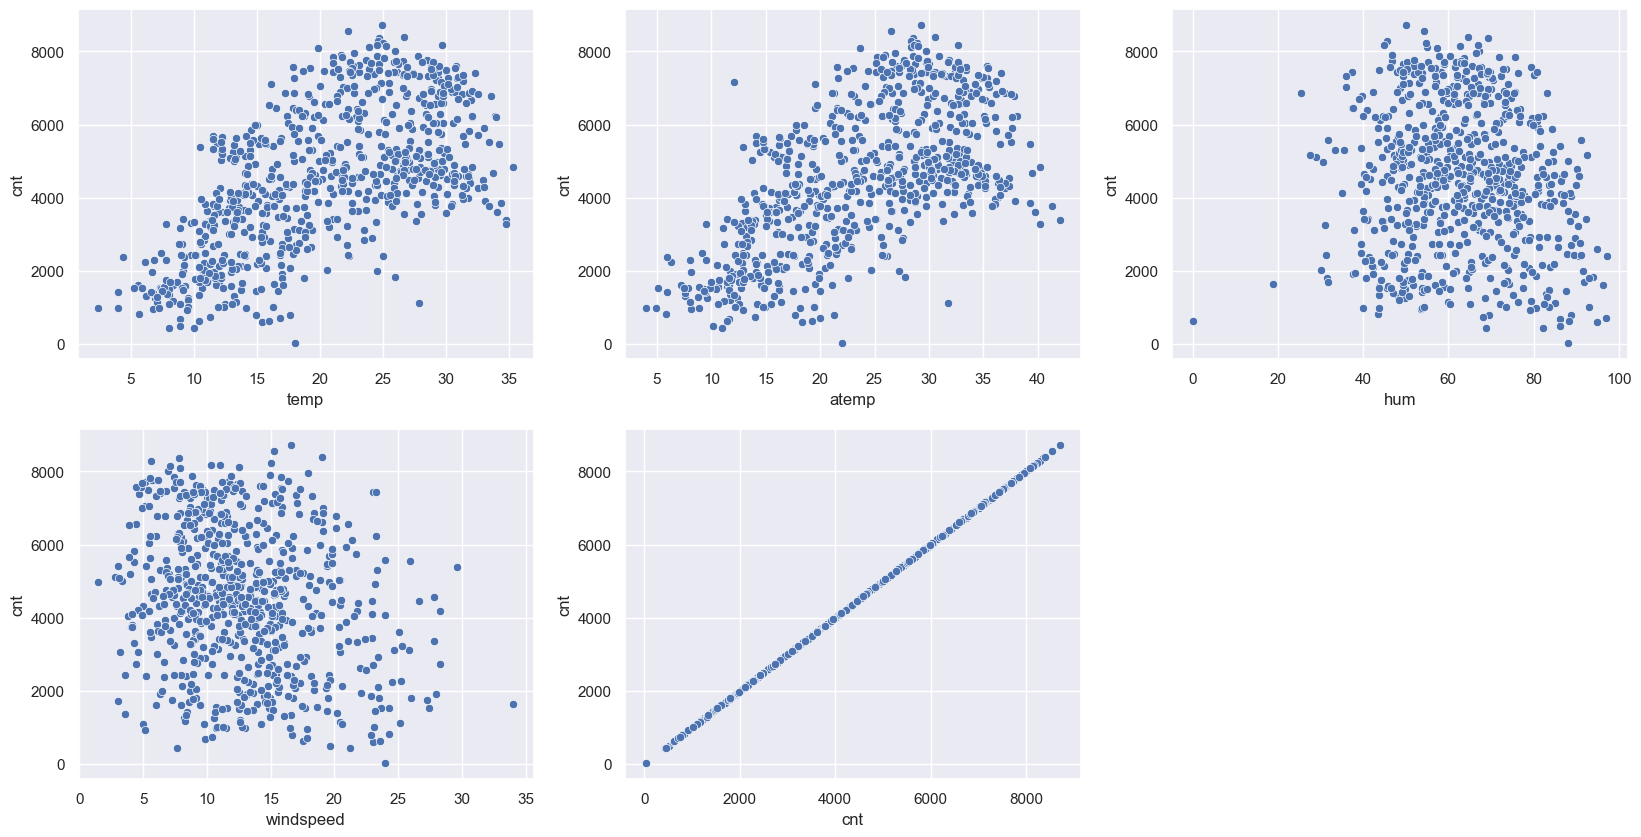

In [17]:
plt.figure(figsize=(20, 10))
for index, var in enumerate(numerical_vars):
    plt.subplot(2, 3, index+1)
    sns.scatterplot(x=bike_sharing_df[var], y=bike_sharing_df['cnt'], palette='spring')
plt.show()

###### Categorical variables

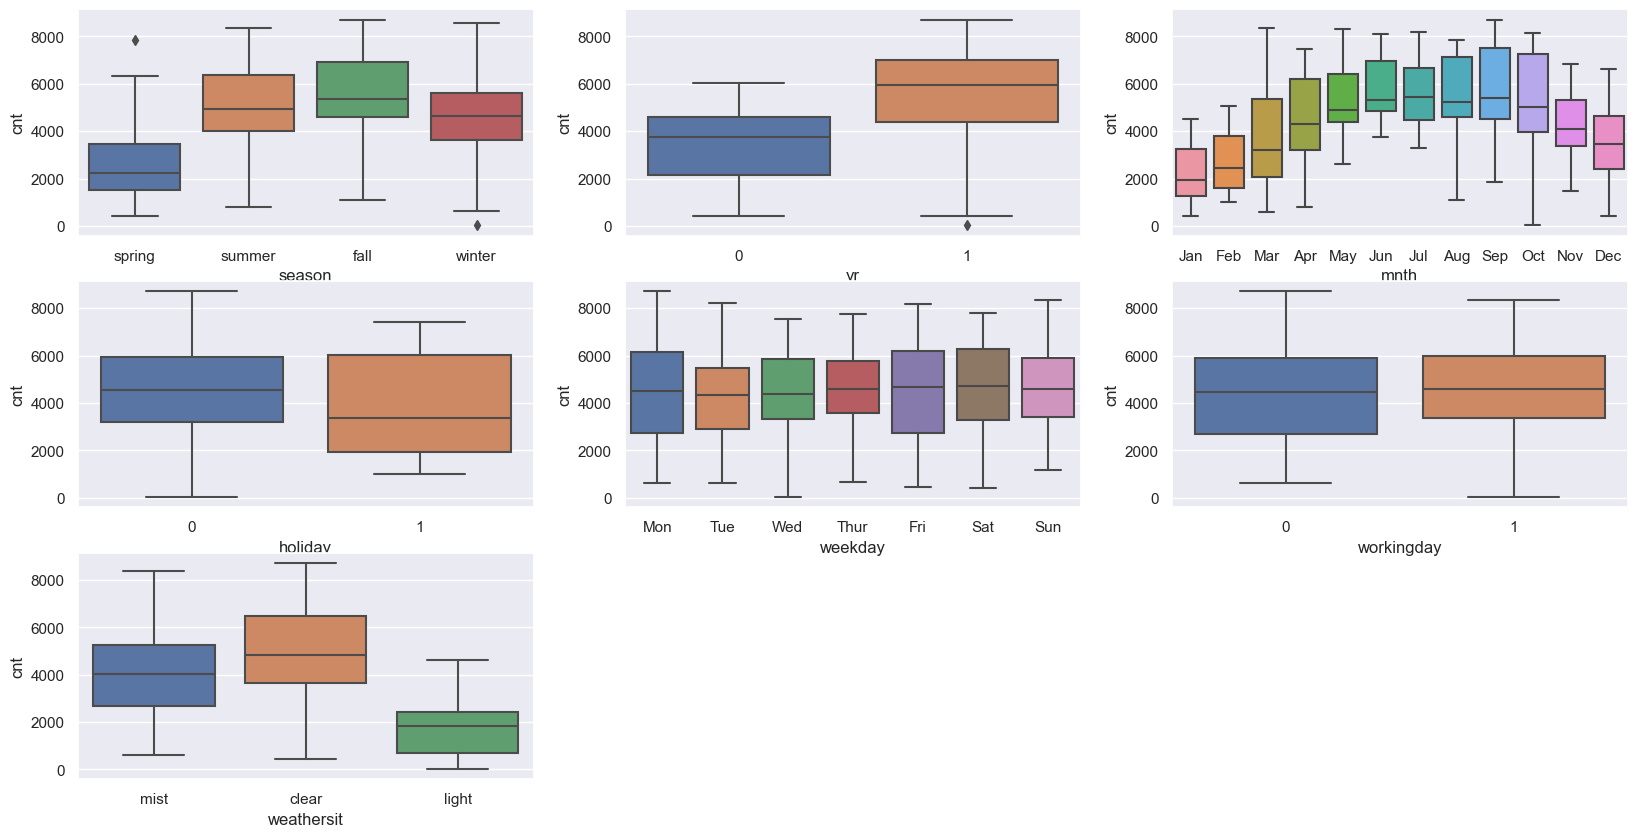

In [18]:
plt.figure(figsize=(20, 10))
for index, var in enumerate(categorical_vars):
    plt.subplot(3, 3, index+1)
    sns.boxplot(x=bike_sharing_df[var], y=bike_sharing_df['cnt'])
plt.show()

### Correlation between variables

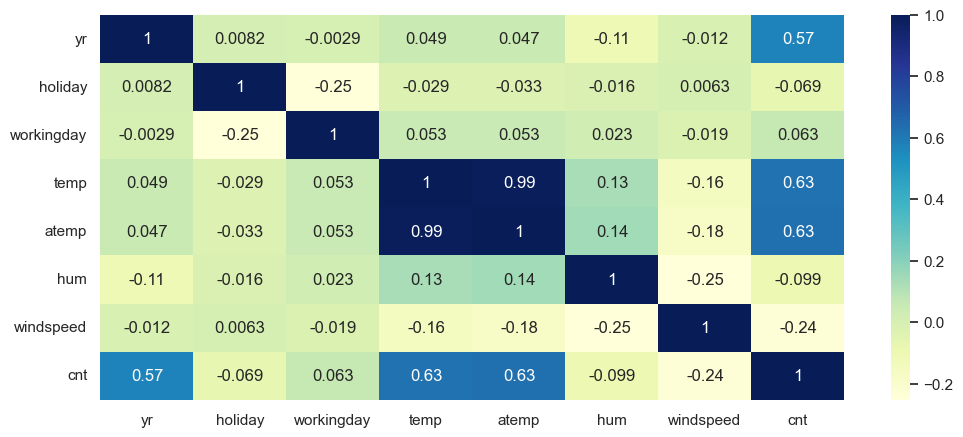

In [19]:
# Plot Heatmap to see correlation between the vairables
plt.figure(figsize=(12, 5))
sns.heatmap(bike_sharing_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

## EDA Summary
#### Univariate Analysis of Numerical vairables
- The `temp` and `atemp` is averagely between 5 to 35 degree Celcius in locations where bike service is deployed.
- The `humidity` is always ranging between 20 to 80 in the bike service location.
- The `windspeed` is always below 30.

#### Univariate Analysis of Calegorical variables
- The `wheater` is usually *clear* in these 2 years.
- `holiday` variable is not that relevant as 97.1 % data is baised.

#### Bivariate Analysis of Numerical variables
- `temp` and a`temp` is directly proportional to number of bikes borrowed.
- Bikes were not borrowed when `humidity` is too <u>low</u>.
- When `windspeed` is <u>high</u> no bikes were borrowed.

#### Bivariate Analysis of Categorical variables
- Outliers are not present for any variable.
- Borrowing of bikes was significantly less for spring `season` than others.
- Borrowing of bikes was double in year(`yr`) 2019 than 2018.
- More bikes were borrowed for all `months` excluding <u>January, February, March</u>.
- More bikes were borrowed when `wheather` is Clear.

#### Correlation of independent variables and target variable
- `temp` and `atemp`, `mnth` and `windspeed` are more correlated to target `cnt` vairable
- `temp` and `atemp` variables are highly MultiCollinear hence `atemp` needs to be dropped

# 2. Preparing Data for Modelling (Pre-Processing)

### Encoding

###### Dummy Variable Creation for `weekday` variable

In [20]:
# Create dummy variable for weekday
weekday = pd.get_dummies(bike_sharing_df['weekday'], drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [21]:
# Concatenate dummy variable to dataframe
bike_sharing_df = pd.concat([bike_sharing_df, weekday], axis=1)

#Dropping the base variable weekday
bike_sharing_df.drop('weekday', axis=1, inplace=True)

###### Dummy Variable Creation for `mnth` variable

In [22]:
# Create dummy variable for season
mnth = pd.get_dummies(bike_sharing_df['mnth'], drop_first=True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Concatenate dummy variable to dataframe
bike_sharing_df = pd.concat([bike_sharing_df, mnth], axis=1)

bike_sharing_df.drop('mnth', axis=1, inplace=True)

###### Dummy Variable Creation for `season` variable

In [24]:
# Create dummy variable for season
season = pd.get_dummies(bike_sharing_df['season'], prefix='season', drop_first=True)
season.head()

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
# Concatinate dummy variable to dataframe
bike_sharing_df = pd.concat([bike_sharing_df, season], axis=1)

# Drop base variable of dummy variable
bike_sharing_df.drop('season', axis=1, inplace=True)

###### Dummy Variable Creation for `weathersit` variable but not dropping first variable `heavy` as wheather data for this variable is not present

In [26]:
# Creating dummy variable for weathersit
weathersit = pd.get_dummies(bike_sharing_df['weathersit'], prefix='weather', drop_first=True)
weathersit.head()

,weather_light,weather_mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [27]:
# Concatinate dummy dataframe to original dataframe
bike_sharing_df = pd.concat([bike_sharing_df, weathersit], axis=1)

# Drop base variable of dummy variable
bike_sharing_df.drop('weathersit', axis=1, inplace=True)

In [28]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Sat,...,Mar,May,Nov,Oct,Sep,season_spring,season_summer,season_winter,weather_light,weather_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,1,0,0,0,0


## Spliting Data into Training and Testing set

In [29]:
# The dataset is split into train and test data using model_selection package of Scikit Learn library 
df_train, df_test = train_test_split(bike_sharing_df, train_size=0.7, test_size=0.3, random_state=100)

## Scaling the Feature
We will use MinMax Scaling to scale all numeric variables in dataset which will convert the values between range 0 to 1

In [30]:
# Create scaler object
scaler = MinMaxScaler()

# Scaling numerical variables in dataset apart from boolean and dummy variables
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

### Dividing the Training data into X and y sets for Model Building

In [31]:
# Segregating target and feature variable training data

# Target variable
y_train = df_train.pop('cnt')

# Feature variables
X_train = df_train

# 3. Building and Training Model

## Recurrsive Feature Elimination

- Following the Bottom-Up Approach and the features will be eliminated by RFE
- Applying __Recursive Feature Elimination (RFE) utility from Scikit Learn__ for feature variable elimination
- Using __LinearRegression function from Scikit Learn__ as it is compatible with RFE

In [32]:
# Creating LinearRegression model and fitting train data in it
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
# Running RFE with 15 number of features to be selected by RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

#### Features selected by RFE using LinearRegression

In [34]:
# Features selected using LinearRegression 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 11),
 ('Thur', False, 10),
 ('Tue', False, 7),
 ('Wed', False, 9),
 ('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_light', True, 1),
 ('weather_mist', True, 1)]

In [35]:
# Only select features which are having relation with target varibale based on RFE results
selected_features = X_train.columns[rfe.support_]

X_train_rfe = X_train[selected_features]

In [36]:
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,Mon,Jan,Jul,Sep,season_spring,season_summer,season_winter,weather_light,weather_mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,0,0,0,0,1,0,0,1
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,1,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,1,0,0,0,0,0,1,0,1


## Building Model using statsmodel library for detailed statistics

#### Function to find Linear Regression model and VIF

In [37]:
# Calculate and display VIF data
def calculate_vif(X_train):
    # Create Empty Dataframe which will contain features and VIF values resp.
    vif = pd.DataFrame()

    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

# Function to create regression model and print stats summary 
def create_linear_regression_model_vif(X_train):
    # Adding a constant variable
    X_train_sm = sm.add_constant(X_train)

    # Create first fitted model
    lr_model = sm.OLS(y_train, X_train_sm).fit()

    # Check parameters obtained
    print(lr_model.params)
    
    # Display summary of first linear regression model obtained
    print(lr_model.summary())
    
    calculate_vif(X_train)
    
    return lr_model, X_train_sm

### Model 1:

#### Create LR model and Check VIF

In [38]:
# Create Linear Regression first model and get VIF details

lr_model_1, X_train_sm1 = create_linear_regression_model_vif(X_train_rfe)


const            0.251042
yr               0.230502
holiday         -0.058529
workingday       0.043521
temp             0.509836
hum             -0.154716
windspeed       -0.185956
Mon              0.053721
Jan             -0.034326
Jul             -0.053193
Sep              0.081186
season_spring   -0.050806
season_summer    0.049660
season_winter    0.094426
weather_light   -0.248777
weather_mist    -0.057824
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.31e-191
Time:                        02:30:19   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:   

### Model 2:
- Dropping column `Jan` as it has high P-Value

In [39]:
X_train_2 = X_train_rfe.drop(columns='Jan', axis=1)

#### Create LR model and Check VIF

In [40]:
# Create Linear Regression second model and get VIF details

lr_model_2, X_train_sm2 = create_linear_regression_model_vif(X_train_2)


const            0.239379
yr               0.229738
holiday         -0.059434
workingday       0.043216
temp             0.527819
hum             -0.159467
windspeed       -0.180601
Mon              0.053203
Jul             -0.054881
Sep              0.081773
season_spring   -0.055434
season_summer    0.052613
season_winter    0.100294
weather_light   -0.246332
weather_mist    -0.057847
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        02:30:19   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BI

### Model 3:
- Dropping feature `hum` as high VIF

In [41]:
X_train_3 = X_train_2.drop(columns='hum', axis=1)

#### Create LR model and Check VIF

In [42]:
# Create Linear Regression third model and get VIF details

lr_model_3, X_train_sm3 = create_linear_regression_model_vif(X_train_3)


const            0.157668
yr               0.233626
holiday         -0.057148
workingday       0.046259
temp             0.492017
windspeed       -0.149124
Mon              0.058008
Jul             -0.049971
Sep              0.075781
season_spring   -0.065288
season_summer    0.046496
season_winter    0.085870
weather_light   -0.290444
weather_mist    -0.083515
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.73e-189
Time:                        02:30:19   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                        

### Model 4:
- Dropping feature `workingday` because of high VIF

In [43]:
X_train_4 = X_train_3.drop(columns='workingday', axis=1)

#### Create LR model and Check VIF

In [44]:
# Create Linear Regression fourth model and get VIF details

lr_model_4, X_train_sm4 = create_linear_regression_model_vif(X_train_4)


const            0.196174
yr               0.233909
holiday         -0.094660
temp             0.492930
windspeed       -0.150024
Mon              0.019913
Jul             -0.052878
Sep              0.076484
season_spring   -0.066781
season_summer    0.045581
season_winter    0.082981
weather_light   -0.285623
weather_mist    -0.081680
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.97e-187
Time:                        02:30:20   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:      

### Model 5:
Dropping feature `Mon` because of high P-Value (0.079)

In [45]:
X_train_5 = X_train_4.drop(columns='Mon', axis=1)

Create LR model and Check VIF

In [46]:
# Create Linear Regression fifth model and get VIF details

lr_model_5, X_train_sm5 = create_linear_regression_model_vif(X_train_5)


const            0.199648
yr               0.233482
holiday         -0.098013
temp             0.491508
windspeed       -0.147977
Jul             -0.052418
Sep              0.076686
season_spring   -0.066942
season_summer    0.045280
season_winter    0.083084
weather_light   -0.285155
weather_mist    -0.081558
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.40e-187
Time:                        02:30:20   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11    

### Model 6:
- Dropping feature `holiday` because of very less correlation with target variable and also infered in EDA

In [47]:
X_train_6 = X_train_5.drop(columns='holiday', axis=1)

Create LR model and Check VIF

In [48]:
# Create Linear Regression fifth model and get VIF details
lr_model_6, X_train_sm6 = create_linear_regression_model_vif(X_train_6)

const            0.197579
yr               0.233873
temp             0.492502
windspeed       -0.149692
Jul             -0.051320
Sep              0.073166
season_spring   -0.069330
season_summer    0.045682
season_winter    0.080538
weather_light   -0.280991
weather_mist    -0.079866
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.55e-185
Time:                        02:30:20   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                              

#### Conclusion
- We should stop training the model.
- If we continue based on high VIF value for temp feature if we drop the feature there is significant drop in the R-squared value.

## Model Interpretation:

### Hypothesis Testing:

Hypothesis testing states that:
- H0: β1 = β2 = β3 = … = βn = 0
- H1: βi ≠ 0

##### lr_model_6 coefficient values
- const:             0.1976
- yr:                0.2339
- temp:              0.4925
- windspeed:        -0.1497
- Jul:              -0.0513
- Sep:               0.0732
- season_spring:    -0.0693
- season_summer:     0.0457
- season_winter:     0.0805
- weather_light:    -0.2810
- weather_mist:     -0.0799

**We Reject Null Hypothesis because above coefficient values are not equal to zero**



##### F-Statistics
The Model is more significant if the F-Statistics value is higher and P-value is equal to 0.</br>
The model `lr_model_6` has below specifications on training data:
  - F-statistic: 245.6
  - Prob (F-statistic): 1.55e-185
  - R-squared: 0.831
  - Adj. R-squared: 0.828
  
##### Best-Fit Line based on `lr_model_6`
cnt = 0.1976 + (yr x 0.2339) + (temp x 0.4925) + (windspeed x -0.1497) + (Jul x -0.0513) + (Sep x 0.0732) + (season_spring x -0.0693) + (season_summer x 0.0457) + (season_winter x 0.0805) + (weather_light x -0.2810) + (weather_mist x -0.0799)

##### Significance of Coefficients:
- `temp`: The bike hire quantity will increase by 0.4925 units for a unit increase of temperature.
- `year`: Every year the bike hire quanitiy will increase by 0.2339 units.
- `season_winter`: In Winter season there is increase of 0.0805 units of bike hire.
- `Sep`: In September month there is increase of 0.0732 units of bike hire.
- `season_summer`: In summer season there is increase of 0.0457 units of bike hire.
- `weather_light`: Every time the weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds the bike hire quantity is reduced by 0.2810 units.
- `windspeed`: For unit increase in windspeed there is decrease of 0.1497 units in the bike hire quantity.
- `weather_mist`: Whenever weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist there is decrease of 0.0799 units in the bike hire quantity.
- `season_spring`: In spring season there is decrease of 0.0693 units of bike hire.
- `Jul`: In July month there is decrease of 0.0513 units of bike hire.

# 4. Residual Analysis of the trained data

#### Error terms are normally distributed
The error terms are normally distributed is one of the major assumptions of linear regression

In [49]:
y_train_pred = lr_model_6.predict(X_train_sm6)

Text(0.5, 0, 'Errors')

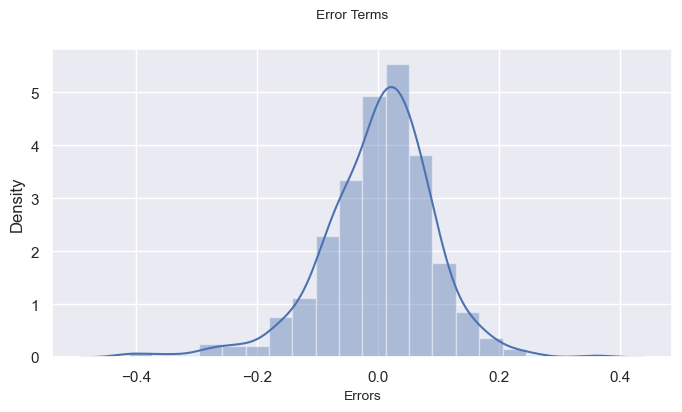

In [50]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8, 4))
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=10)
plt.xlabel('Errors', fontsize=10)

#### Linear Relationship between X and Y
- There is linear relationship between independent variable and dependent variable

<Figure size 500x300 with 0 Axes>

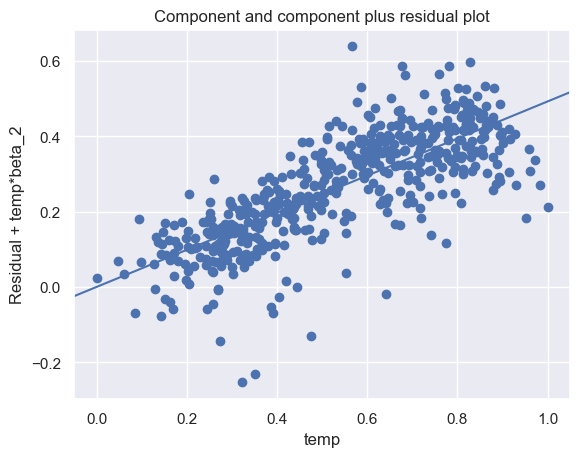

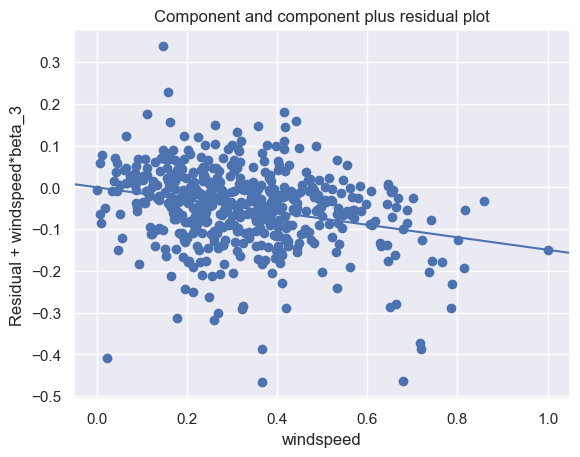

In [51]:
# Component and Component plus residual plot
# plt.rcParams['figure.figsize'] = [5, 3]
plt.figure(figsize=(5,3))
for index, var in enumerate(['temp', 'windspeed']):
    sm.graphics.plot_ccpr(lr_model_6, var)
    plt.show()

#### MoltiCollinearity
- There is no Multicollinearity between predictor variables as all VIFs values are less than 5

In [52]:
calculate_vif(X_train_6)

        Features   VIF
1           temp  5.09
2      windspeed  4.60
6  season_summer  2.21
0             yr  2.07
5  season_spring  2.07
7  season_winter  1.77
3            Jul  1.58
9   weather_mist  1.54
4            Sep  1.33
8  weather_light  1.08


# 5. Predictions and Evaluations on test data

#### Applying scaling on the test data set

In [53]:
# Scaling numerical variables in dataset apart from boolean and dummy variables
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

#### Dividing into X_test and y_test

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

# Selecting variables that are in final mode
X_test = X_test[X_train_6.columns]

In [55]:
# Add a constant variable
X_test_sm = sm.add_constant(X_test)

In [56]:
X_test_sm.head()

,const,yr,temp,windspeed,Jul,Sep,season_spring,season_summer,season_winter,weather_light,weather_mist
184,1.0,0,0.831783,0.084219,1,0,0,0,0,0,1
535,1.0,1,0.901354,0.153728,0,0,0,1,0,0,0
299,1.0,0,0.511964,0.334206,0,0,0,0,1,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,1,0,0,0


###  Predict target variable

In [57]:
# Make prediction on test data using final model (lr_model_6)
y_pred = lr_model_6.predict(X_test_sm)

###  Model Evaluation

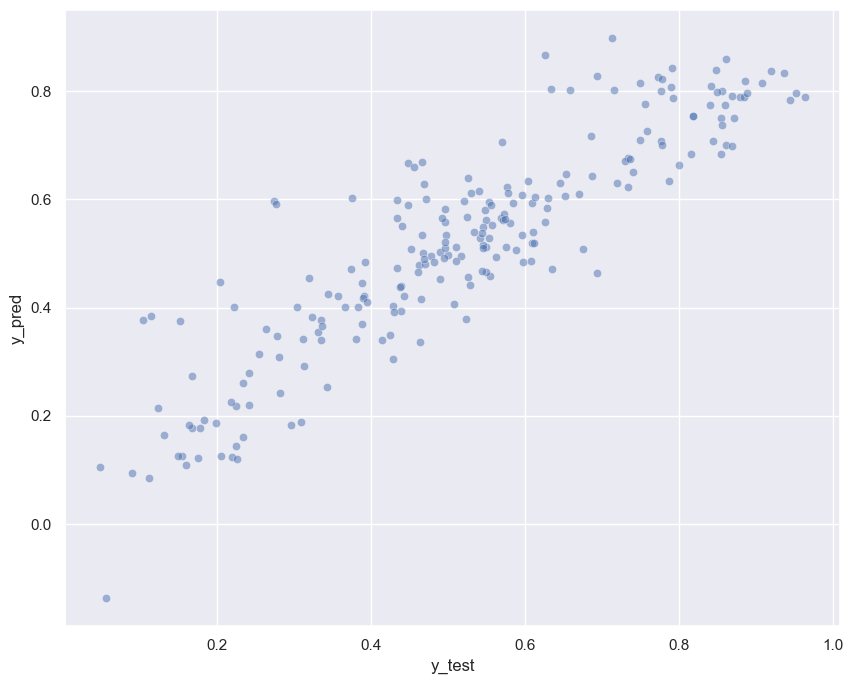

In [74]:
# Plotting y_test and Y_pred to understand the spread
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# 5. R-squared scores

### R-squared scores on Train set

In [75]:
# R-squared value on train set
r2_train = r2_score(y_train, y_train_pred)
print(f"Train R-squared: {r2_train}")

Train R-squared: 0.8311134137807727


#### Adjusted R-squared on Train set

In [60]:
# The number of observations
n = X_train_6.shape[0]

# The number of predictor variable
k = X_train_6.shape[1]

adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - k - 1)
print(f"Train Adjusted R-squared: {adjusted_r2_train}")

Train Adjusted R-squared: 0.8277289130549366


### R-squared scores on Test set

In [76]:
# R-squared value on test set
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8034730440938537


#### Adjusted R-squared on Test data

In [62]:
# The number of observations
n = X_test.shape[0]

# The number of predictor variable
k = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.794024632752212


# Final Conclusion

##### F-Statistic
  - Train R-squared: 0.831
  - Train Adjusted R-squared: 0.828
  - Test R-squared: 0.803
  - Test Adjusted R-squared: 0.794
  
  __The model is Good based on the R-squared and Adj. R-squared metrics.__
  
##### Best-Fit Line based on `lr_model_6`
cnt = 0.1976 + (yr x 0.2339) + (temp x 0.4925) + (windspeed x -0.1497) + (Jul x -0.0513) + (Sep x 0.0732) + (season_spring x -0.0693) + (season_summer x 0.0457) + (season_winter x 0.0805) + (weather_light x -0.2810) + (weather_mist x -0.0799)

##### The top 3 predictor variables on which influence the bike booking:
- **Temperature(temp)**: The bike hire quantity will increase by 0.4925 units for a unit increase of temperature.
- **Year(yr)**: Every year the bike hire quanitiy will increase by 0.2339 units.
- **weather_light**: Every time the weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds the bike hire quantity is reduced by 0.2810 units.

##### Other predictor variables on which influence the bike booking based on impact type and highest correlation:

- **Winter Season (season_winter)**: In Winter season there is increase of 0.0805 units of bike hire.
- **Month of September(Sep)**: In September month there is increase of 0.0732 units of bike hire.
- **Summer Season (season_summer)**: In summer season there is increase of 0.0457 units of bike hire.

- **windspeed**: For unit increase in windspeed there is decrease of 0.1497 units in the bike hire quantity.
- **weather_mist**: Whenever weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist there is decrease of 0.0799 units in the bike hire quantity.
- **Spring Season (season_spring)**: In spring season there is decrease of 0.0693 units of bike hire.
- **Month of July (Jul)**: In July month there is decrease of 0.0513 units of bike hire.